# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [1]:
import numpy as np
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
def max_element(arr):
    b=np.diff(arr)
    b=np.insert(b,0,-1)
    out=np.where(a==b, arr, 0)
    print(np.amax(out))
max_element(a)

Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [2]:
X = np.arange(0,10).reshape((2, 5))
v = 0.6
def nearest_value(X, v):
    X = np.reshape(X, X.size)
    print(X[(np.abs(X-v)).argmin()])
nearest_value(X,v)

1


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [3]:
import numpy as np
x=np.random.randint(10, size=(5, 6))
def scale(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    if stds.all():
        print((X - means) / stds)
    else: print("Происходит деление на ноль")
scale(X)

[[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [4]:
X=np.random.normal(10,1 ,size=(5, 5))
def get_stats(X):
    print("Определитель:")
    print(np.linalg.det(X))
    print("След:")
    print(np.trace(X))
    print("Наименьший и наибольший элементы:")
    print(np.amin(X))
    print(np.amax(X))
    print("Норма Фробениуса:")
    print(np.linalg.norm(X))
    print("Собственные числа:")
    print(np.linalg.eigvals(X))
    print("Обратная матрица:")
    print(np.linalg.inv(X))
print(X)
print("Stats:")
get_stats(X)

[[ 9.134587   10.22699091  9.36932779  9.06767182  9.66228266]
 [ 9.42727053 10.2947356   8.75214313  9.07846965  9.62457757]
 [10.09727508 10.47628537  9.46357938 11.85025745  9.65968831]
 [ 9.20478252  9.9893219   9.58375214 10.73856758  9.8773537 ]
 [ 7.10798593  9.96841823 10.49650982 10.79321486 11.60560736]]
Stats:
Определитель:
14.736308608501492
След:
51.23707692285025
Наименьший и наибольший элементы:
7.107985931076825
11.850257454690734
Норма Фробениуса:
49.32955345984249
Собственные числа:
[49.11759249+0.j          1.31857795+0.67617287j  1.31857795-0.67617287j
 -0.25883573+0.2638835j  -0.25883573-0.2638835j ]
Обратная матрица:
[[-1.10752016  0.63325838 -1.40193919  2.59478167 -0.64459808]
 [ 1.9084071  -0.56814881  2.40898826 -4.50169979  0.70857376]
 [ 1.42742157 -1.47881431 -0.29543525  0.59187572 -0.21985416]
 [-0.19746432 -0.11665486  0.63715679 -0.51238164  0.16689764]
 [-2.06824437  1.54613391 -1.53587564  2.21864911 -0.0840306 ]]


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [5]:
import numpy as np
maxes=np.array([])
for exp_num in range(100):
    a=np.random.normal(10, 1 ,size=(10, 10))
    b=np.random.normal(10, 1 ,size=(10, 10))
    new=a@b
    maxes=np.append(maxes,np.amax(new))
print(maxes.mean())
print(np.quantile(maxes, 0.95))

1100.3833163054765
1150.7786903451747


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [6]:
import pandas as pd
df = pd.read_csv("2008.csv")
grouped = df.groupby(['Origin'])
grouped.size()

Origin
ABE     45
ABI     30
ABQ    408
ABY      7
ACK      5
      ... 
WRG      8
XNA    132
YAK     11
YKM      3
YUM     34
Length: 297, dtype: int64

In [7]:
%matplotlib inline
df = pd.read_csv("2008.csv")
df["CancellationCode"].describe().top

'A'

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [8]:
distances = df["Distance"]
df["Distance"].describe().min
df["Distance"].describe().max
df["Distance"].describe().std

<bound method Series.std of count    70000.000000
mean       724.508257
std        565.485009
min         31.000000
25%        324.000000
50%        575.000000
75%        950.000000
max       4962.000000
Name: Distance, dtype: float64>

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [9]:
mins = df[df["Distance"].isin([df["Distance"].min()])]
ourNumbers = df[df["FlightNum"].isin(mins["FlightNum"])]
ourNumbers

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
501,2008,3,20,4,1253.0,1252,1427.0,1436,FL,64,...,7.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
1389,2008,3,13,4,1748.0,1804,2048.0,2057,AS,64,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1517,2008,7,10,4,733.0,730,837.0,834,AS,65,...,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2619,2008,5,23,5,1612.0,1605,29.0,24,US,64,...,10.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66529,2008,12,21,7,1125.0,838,1202.0,927,AS,65,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,155.0
67172,2008,3,22,6,1251.0,1252,1424.0,1436,FL,64,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
68264,2008,9,7,7,1424.0,1430,1541.0,1555,WN,65,...,8.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
68338,2008,8,3,7,1528.0,1525,1826.0,1823,CO,65,...,9.0,44.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [10]:
top = df["Origin"].describe().top
airports = pd.read_csv("airports.csv")
airports[airports["iata"] == top]

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [11]:
groups = df.groupby(['Origin']).mean()
groups['AirTime'].max()

205.2

Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [12]:
groups = df.groupby(['Origin'])
mostDelayed = 0
for name, group in groups:
    delayed = group[group['DepDelay'] > 0]
    if (group.shape[0] >= 1000 and delayed.shape[0] / group.shape[0] > mostDelayed):
        mostDelayed = delayed.shape[0] / group.shape[0]
print(mostDelayed)

0.5111591072714183


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [13]:
df.columns[df.isnull().any()]

Index(['DepTime', 'ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut',
       'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
69995    True
69996    True
69997    True
69998    True
69999    True
Length: 70000, dtype: bool

In [15]:
df.isnull().sum().sum()

355215

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [16]:
notnulls = df[df['DepDelay'].notnull()]
delays = notnulls[notnulls['DepDelay'] != 0]
delays

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [17]:
values = delays['DepDelay'].values
values

array([16., 16., -2., ..., 24.,  6., -1.])

In [18]:
delays.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [19]:
delays = delays.drop(columns=['DepDelay'])
delays = delays.drop(columns=['Cancelled', 'CancellationCode'])
delays.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [20]:
delays

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0


In [21]:
delays.columns[delays.isnull().any()]

Index(['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [22]:
delays['DepTime_Hour'] = (delays['DepTime'] / 100).apply(np.floor)
delays['DepTime_Minute'] = (delays['DepTime'].mod(100))

delays['CRSDepTime_Hour'] = (delays['CRSDepTime'] / 100).apply(np.floor)
delays['CRSDepTime_Minute'] = (delays['CRSDepTime'].mod(100))

delays['ArrTime_Hour'] = (delays['ArrTime'] / 100).apply(np.floor)
delays['ArrTime_Minute'] = (delays['ArrTime'].mod(100))

delays['CRSArrTime_Hour'] = (delays['CRSArrTime'] / 100).apply(np.floor)
delays['CRSArrTime_Minute'] = (delays['CRSArrTime'].mod(100))

delays

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,NaN,NaN,21.0,11.0,20.0,55,23.0,8.0,23.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,NaN,NaN,14.0,26.0,14.0,10,17.0,30.0,17.0,28
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,NaN,NaN,11.0,43.0,11.0,45,15.0,1.0,15.0,20
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,NaN,NaN,11.0,41.0,11.0,44,13.0,23.0,13.0,35
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,NaN,NaN,8.0,15.0,8.0,20,12.0,43.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,NaN,NaN,9.0,20.0,9.0,25,11.0,10.0,11.0,18
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,NaN,NaN,18.0,29.0,18.0,40,21.0,37.0,21.0,49
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,0.0,22.0,11.0,49.0,11.0,25,13.0,36.0,13.0,14
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,0.0,6.0,19.0,6.0,19.0,0,22.0,0.0,21.0,39


In [23]:
delays = delays.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'])

delays.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [24]:
delays = delays.drop(columns=['TailNum', 'Year'])
delays = delays.drop(columns=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
delays.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'DepTime_Hour',
       'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute',
       'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour',
       'CRSArrTime_Minute'],
      dtype='object')

In [25]:
delays

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,8.0,MDW,...,8.0,0,21.0,11.0,20.0,55,23.0,8.0,23.0,0
1,6,4,3,XE,2380,124.0,138.0,108.0,2.0,IAH,...,12.0,0,14.0,26.0,14.0,10,17.0,30.0,17.0,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-19.0,MDW,...,9.0,0,11.0,43.0,11.0,45,15.0,1.0,15.0,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-12.0,SLC,...,19.0,0,11.0,41.0,11.0,44,13.0,23.0,13.0,35
4,5,4,7,WN,399,148.0,160.0,136.0,-17.0,LAS,...,8.0,0,8.0,15.0,8.0,20,12.0,43.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-8.0,CVG,...,13.0,0,9.0,20.0,9.0,25,11.0,10.0,11.0,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-12.0,ORD,...,20.0,0,18.0,29.0,18.0,40,21.0,37.0,21.0,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,22.0,ORD,...,13.0,0,11.0,49.0,11.0,25,13.0,36.0,13.0,14
69998,2,18,1,NW,641,234.0,219.0,192.0,21.0,RSW,...,22.0,0,19.0,6.0,19.0,0,22.0,0.0,21.0,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

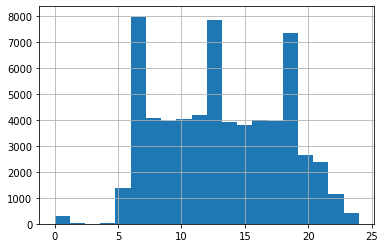

In [26]:
delays['DepTime_Hour'].hist(bins=20)

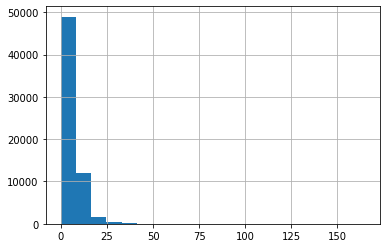

In [27]:
delays['TaxiIn'].hist(bins=20)

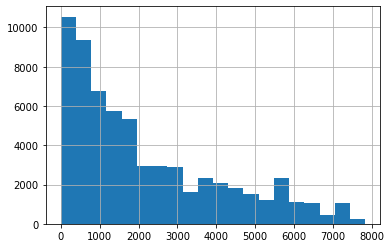

In [28]:
delays['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def transform_data(data):
    data = data.fillna(0)
    numbers = data.select_dtypes(include='number')
    scaled_numbers = scaler.fit_transform(numbers.values)
    categories = data.select_dtypes(exclude='number')
    categories = pd.get_dummies(categories)
    numbers_result = pd.DataFrame(scaled_numbers, index=numbers.index, columns=numbers.columns)
    return pd.concat([numbers_result, categories], axis=1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [30]:
delays = transform_data(delays)
delays

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,-0.744130,-0.786908,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.183961,-0.582387,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,0.471018,-0.582387,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.347886,-0.582387,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,0.634799,-0.582387,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.431159,-0.120706,1.053782,...,0,0,0,0,0,0,0,0,0,0
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.533455,-0.217566,3.098994,...,0,0,0,0,0,0,0,0,0,0
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.336062,-1.043514,-0.582387,...,0,0,0,0,0,0,0,0,0,0
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,0.310488,1.208912,2.689951,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(delays, values, train_size=0.7, test_size=0.3)

In [32]:
X_train

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
42106,-0.411252,-0.197382,-0.462767,0.365416,-0.451065,-0.959739,-0.922985,0.873116,-0.902628,-0.786908,...,0,0,0,0,0,0,0,0,0,0
61922,-0.118281,-1.558984,-1.464878,0.538511,0.822941,1.085755,1.051586,-0.533455,1.265267,-0.377866,...,0,0,0,0,0,0,0,0,0,0
20626,1.346576,-0.310849,0.038288,-0.884765,1.785524,1.815267,1.788367,-0.354437,1.363888,-0.377866,...,0,0,0,0,0,0,0,0,0,0
21668,1.346576,-1.558984,1.541454,-0.923287,-0.691711,-0.773785,-0.687215,2.356409,-0.677209,0.440219,...,0,0,0,0,0,0,0,0,0,0
65977,0.174690,0.937286,0.038288,2.635158,-0.366131,-0.201619,-0.318825,0.310488,-0.236938,-0.786908,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0.174690,1.391153,-1.464878,-0.274570,0.369961,0.170289,0.079036,0.003599,-0.113662,3.508036,...,0,0,0,0,0,0,0,0,0,0
45958,-1.290166,-1.672451,0.539343,2.596122,-0.267042,-0.287444,-0.200940,3.328222,-0.451790,-0.377866,...,0,0,0,0,0,0,0,0,0,0
41732,1.053604,-0.764716,0.038288,-0.558095,-1.795850,0.241810,-1.527145,-0.226567,0.217422,-1.400472,...,0,0,0,0,0,0,0,0,0,0
3247,1.639547,-1.558984,-0.963823,-0.576072,-0.889890,-0.773785,-0.790364,-0.533455,-0.742369,-0.377866,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
44242,-1.583137,0.710352,-0.963823,1.947404,-0.748333,-0.974043,-0.819835,0.259340,-0.856839,0.235697,...,0,0,0,0,0,0,0,0,0,0
13290,0.467662,0.369952,-0.963823,2.028558,0.044382,0.184593,0.020094,-0.635751,0.127607,0.440219,...,0,0,0,0,0,0,0,0,0,0
24295,-1.583137,1.277686,1.541454,-0.910960,0.355806,0.413460,0.226392,-0.431159,0.573161,0.031176,...,0,0,0,0,0,0,0,0,0,0
21775,0.174690,1.164220,1.040399,2.605881,-1.187158,-1.031260,-1.173490,-0.738047,-1.136852,1.053782,...,0,0,0,0,0,0,0,0,0,0
53957,0.174690,1.618087,-0.462767,-0.803611,1.700590,1.944004,1.891516,-0.738047,2.045427,-0.582387,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815,0.467662,0.256485,-1.464878,0.140445,-0.946512,-0.988347,-0.893514,-0.098697,-0.848034,-0.582387,...,0,0,0,0,0,0,0,0,0,0
45788,1.053604,1.504620,-0.462767,1.933536,-1.088068,-1.102780,-1.055605,-0.328863,-1.003009,-0.582387,...,0,0,0,0,0,0,0,0,0,0
64322,-0.411252,0.483419,-0.963823,-1.044505,-0.804956,-0.859610,-0.922985,-0.175419,-0.886778,-0.377866,...,0,0,0,0,0,0,0,0,0,0
61651,0.760633,-0.764716,-0.963823,-0.990573,0.086849,0.256114,0.182186,-0.686899,0.183961,-0.377866,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_train

array([10.,  8., -2., ...,  2., -1., 16.])

In [35]:
y_test

array([ 6., -4., -2., ...,  1., -4., -5.])

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train1000 = X_train.head(1000)
y_train1000 = y_train[0:1000]
X_test1000 = X_test.head(1000)
y_test1000 = y_test[0:1000]
reg = LinearRegression().fit(X_train1000.values, y_train1000)
test1000predict = reg.predict(X_test1000.values)
mean_squared_error(y_test1000, test1000predict)

6.152241158234213e+20

In [37]:
r2_score(y_test1000, test1000predict)

-3.971838082451065e+17

In [38]:
testPredict = reg.predict(X_test.values)
mean_squared_error(y_test, testPredict)

6.847087769829879e+20

In [39]:
r2_score(y_test, testPredict)

-5.268441429619956e+17

In [40]:
reg.coef_.sum()

-25173110602556.555

In [41]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [42]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [43]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [44]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [45]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [46]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [47]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [48]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [49]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

SyntaxError: unexpected EOF while parsing (<ipython-input-49-5932eb1c2833>, line 2)

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.